# <img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/INSAID_Full%20Logo.png" width="240" height="360" />
# Exploratory Data Analysis on Movie Dataset

## Table of Contents

1. [Problem Statement](#section1)
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    -  3.1 [Understanding the dataset](#section301)
    -  3.2 [Pre-profiling](#section302)
    -  3.3 [Pre-processing](#section303)
    -  3.4 [Post-profiling](#section304)
    -  3.5 [Checking for incorrect datatypes](#section305)
4. [Questions and EDA](#section4)
    -  4.1 [What is the trend in the movie industry over the years?](#section401)  
       - 4.1.1 [Is the number of movies increasing over the years?](#section4011)
       - 4.1.2 [Is the Revenue from movies increasing over the years?](#section4012)
       - 4.1.3 [Is the average Revenue from movies increasing over the years?](#section4013)
       - 4.1.4 [Is the popularity of the movies increasing over the years?](#section4014)
    -  4.2 [What impact do Directors on the movie?](#section402)
       - 4.2.1 [Does a particular Director's movie receive higher Revenue?](#section4021)
       - 4.2.2 [Does a particular Director's movie receive higher IMDB Rating?](#section4022)
       - 4.2.3 [Does a particular Director's movie receive higher Metacritic score?](#section4023)
       - 4.2.4 [Who are the top Active Directors?](#section4024)
       - 4.2.5 [How much is the Revenue contribution by the top Active Directors?](#section4025)
       - 4.2.6 [What are the average Revenue, Rating and Metascore for the top Active Directors?](#section4026)
    -  4.3 [What is the impact of Runtime on movies?](#section403)
       - 4.3.1 [Which interval of Runtime receives higher revenue? ](#section4031)
    -  4.4 [What are the different Genre of movies and its effect on outcome of a movie?](#section404)
       - 4.4.1 [Does the combination of Genres in the movie affect the Revenue, Popularity, Critical Acclaim of the movie?](#section4041)
       - 4.4.2 [What are the Genres that that bring higher Revenue, higher Rating and higher Critical Acclaim for a movie?](#section4042)
    -  4.5 [What is the characteristics of movies in 2016?](#section405)
    -  4.6 [Do Ratings have any correlation with other aspects of the movies?](#section406)  
    -  4.7 [What is the relationship between Revenue, Rating and Metascore of movies?](#section407)
5. [Conclusion](#section5)
6. [Actionable Insights](#section6)

<a id='section1'></a>
### 1. Problem Statement


> NeoAge Cinema, a production company had been running in losses for the past 3 years. In 2017, the new management of NeoAge Cinema decides to produce movies that will earn the best in terms of revenue, popularity and acclaim. However prior to that it wanted to do some market study and therefore approaches DeepRoot Analytica, a private consultancy firm who are reknowed for data analytics. NeoAge Cinema asks them to come up with characteristics of movies that will help them achieve their purpose. DeepRoot Analytica uses the IMDB database of 1000 movies for the past 10 years (2006-2016) to come up with the characteristics of movies that earn:
> 1. The Highest Revenue
> 2. Popularity (IMDB Rating)
> 3. Critical Acclaim (Metacritic Rating or Metascore)

> NeoAge Cinema also wants to know whether this is the right time to invest in the movie industry and what strategy they should use to maximize benefits.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models

<a id='section2'></a>
### 2. Data Loading and Description

> The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.  

> Below is the data dictionary explaining the various columns of the dataset

| Columns | Description     |
|---------|-----------------|
|   Rank  | Movie rank order|
| Title   |The title of the film|
|Genre    | A comma-separated list of genres used to classify the film|
|Description|Brief one-sentence movie summary|
|Director   |The name of the film's director|
|Actors     |A comma-separated list of the main stars of the film|
|Year       |The year that the film released as an integer.|
|Runtime (Minutes)|The duration of the film in minutes.|
|Rating|User rating for the movie 0-10|
|Votes|Number of votes|
|Revenue (Millions) | Movie revenue in millions|
|Metascore|An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|

#### Some Background Information

>IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

> Users registered on this site are  invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.

> It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.

<a id='section3'></a>
#### Importing packages

In this section, we are going to <strong>Load</strong> all the packages that will be required for <strong>Gathering, Assessing and Cleaning</strong> the data.

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import itertools
from itertools import cycle, islice
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [4]:
# Read the data into Pandas DataFrame
#movies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')              # Importing training dataset using pd.read_csv
movies = pd.read_csv('https://raw.githubusercontent.com/sujaksar073/1000-Movies-Data---EDA/master/1000%20movies%20data.csv?token=AvGUDsRU-mixvRZiPlrKec5CSHO_JNHnks5cs0G9wA%3D%3D')              # Importing 1000 Movie Dataset using pd.read_csv

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [5]:
movies.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(1000, 12)

The movies dataframe has __1000 rows__ and __12 columns.__

In [6]:
movies.columns                                            # This will print the names of all columns.

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [7]:
# Examine the head entries of the dataset
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
movies.tail()                                                   # This will print the last n rows of the Data Frame

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [9]:
movies.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [10]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [11]:
# Check for number of unique values for the column 'Title'
movies.Title.nunique()

999

#####  Why is unique 'Titles' count not equal to the no: of rows of the dataset. Are there any duplicate movies ?

In [12]:
# Check for duplicate values in the column 'Title'
movies.Title.duplicated().any()

True

In [13]:
# Find out the movies with duplicate 'Title'
movies.loc[movies.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


> ##### Based on the query it is observed that there are no duplicate movies. The movies by the same Title "The Host" were released on 2006 and 2013. However they are 2 different movies

In [14]:
# Count the number of missing values in each column
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [15]:
def missing_value_pct(series):
    """
    Returns the missing value percentage of a series
    """
    return series.isnull().mean()

In [16]:
# Percentage of missing values in Revenue column
missing_value_pct(movies["Revenue (Millions)"])

0.128

In [17]:
# Percentage of missing values in Metascore column
missing_value_pct(movies["Metascore"])

0.064

> ##### "Revenue (Millions)" and "Metascore" are the key elements that will define NeoAge Cinema's future busines decision, we will require them to great extent for the EDA. So these columns cannot be dropped.
> ##### The percentage of rows that have missing values for "Revenue (Millions) is around 13%. This is quite high. So we will fill the missing values.
> ##### The percentage of rows that have missing values for "Metascore" is around 6%. This being not so high, we will drop the rows that have missing values for this column


<a id='section302'></a>
### 3.2 Pre-Profiling

We will use pandas profiling, which will generate an interactive HTML report containing all the information about the columns of the dataset, like the counts and type of each column. Detailed information about each column, correlation between different columns and a sample of dataset.
It will give us: a) Visual interpretation of each column in the data, b)Spread of the data can be better understood by the distribution plot, c) Grannular level analysis of each column.

In [18]:
# Using the pandas_profiling lib to generate report before pre-processing
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_preprocessing.html")

<a id='section303'></a>
### 3.3 Pre-Processing

- Dealing with missing values<br/>
    - Replacing missing values of __'Revenue'__ with median values as it is significant enough not to be dropped.
    - Deleting the rows that have missing values for __'Metascore'__ as the % of such missing values is not much.

In [19]:
# Filling the missing values with the median value
median_revenue = movies['Revenue (Millions)'].median()
movies['Revenue (Millions)'].fillna(value=median_revenue, inplace=True)

In [20]:
# Check if there are anymore missing values for 'Revenue'
movies['Revenue (Millions)'].isnull().any()

False

In [21]:
# Deleting the rows that having missing values for 'Metascore'
movies.dropna(subset=['Metascore'], inplace=True)

In [22]:
# Check if there are anymore missing values for 'Metascore'
movies.Metascore.isnull().any()

False

In [23]:
# Check the new shape of the dataset
movies.shape

(936, 12)

<a id='section304'></a>
### 3.4 Post-profiling

In [24]:
# Using the pandas_profiling lib to generate report after pre-processing
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_postprocessing.html")

Now we have preprocessed the data and the dataset doesnot contain missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. We can compare the two reports, i.e movies_after_preprocessing.html and movies_before_preprocessing.html.
In movies_after_preprocessing.html report, observations:
In the Dataset info, Total Missing(%) = 0.0% 
Number of variables = 12 

<a id='section305'></a>
### 3.5 Checking for incorrect datatype

In [25]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

> ##### The data types of the movies columns seems to be mapped correctly. So no correction in datatypes is required

> ##### Since the movie titles are unique, let us set the index of the DataFrame to movie title

In [26]:
# Set the index of the DataFrame to the movie 'Title'
movies.set_index('Title', inplace=True)

In [27]:
# Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for ease of accessing columns
movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [28]:
# Check the head entries to see the changes
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [29]:
# Finally check for any missing values in the whole DataFrame
movies.isnull().any().any()

False

> ##### Now that all cleanup is done, let us use the dataset for exploration and identify the findings.

<a id='section4'></a>
### 4. Questions & EDA

In this section, we are going to <strong>Explore</strong> the dataset using specific <strong>Questions</strong>. This involves Exploring and Augmenting the dataset based on the questions. We will use descriptive statistics and also data visualization to help explore the dataset.

<a id='section401'></a>
### 4.1 What is the trend in the movie industry over the years?

<a id='section4011'></a>
### 4.1.1 Is the number of movies increasing over the years ?

In [30]:
movies_year = movies.groupby('Year')['Rank'].count()

In [31]:
movies_year.head(11)

Year
2006     41
2007     46
2008     49
2009     49
2010     59
2011     58
2012     62
2013     86
2014     95
2015    123
2016    268
Name: Rank, dtype: int64

Text(0, 0.5, 'Movies Count')

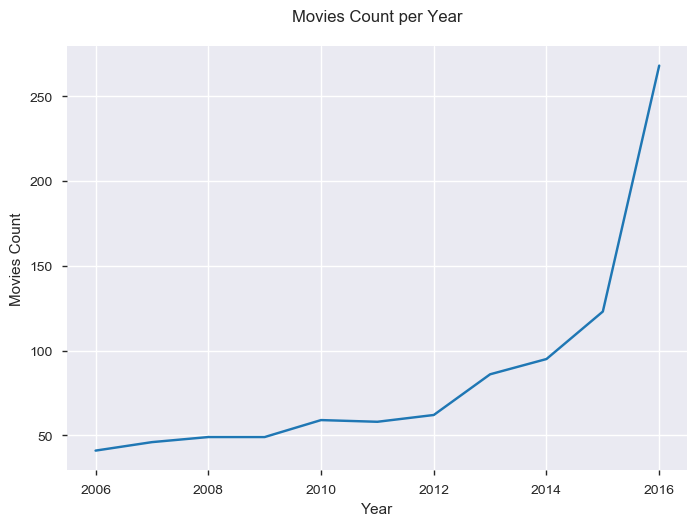

In [32]:
# Plotting the movies count per year
ax = movies_year.plot.line();
ax.set_title('Movies Count per Year', y=1.04)
ax.set_ylabel('Movies Count')

Text(0.5, 1.0, 'Movie Count by Year')

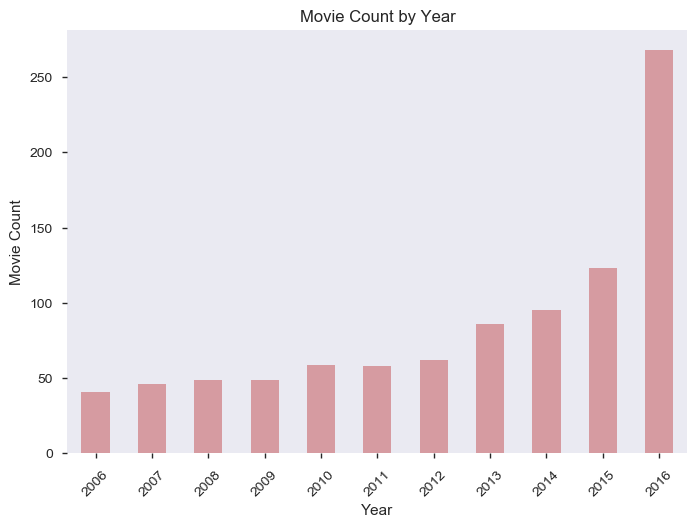

In [33]:
movie_yearly_count = movies['Year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

> ##### 1. It is observed that barring 2009 and 2011, there has been a constant uptrend in the number of movies produced in subsequent years.
> ##### 2. It is also observed that there is a massive spurt in the movies being produced in the year 2016.
> ##### 3. There is a significant increase(more than double, 118% increase) in the number of movies released in 2016, when compared to the number of movies released in 2015.

<a id='section4012'></a>
### 4.1.2  Is the Revenue from movies increasing over the years ?

In [34]:
movies_revenue = movies.groupby('Year')['Revenue'].sum()

In [35]:
movies_revenue.head(11)

Year
2006     3577.480
2007     4191.230
2008     4729.205
2009     5400.330
2010     6085.620
2011     5389.075
2012     6826.390
2013     7495.080
2014     8041.300
2015     9470.880
2016    14361.040
Name: Revenue, dtype: float64

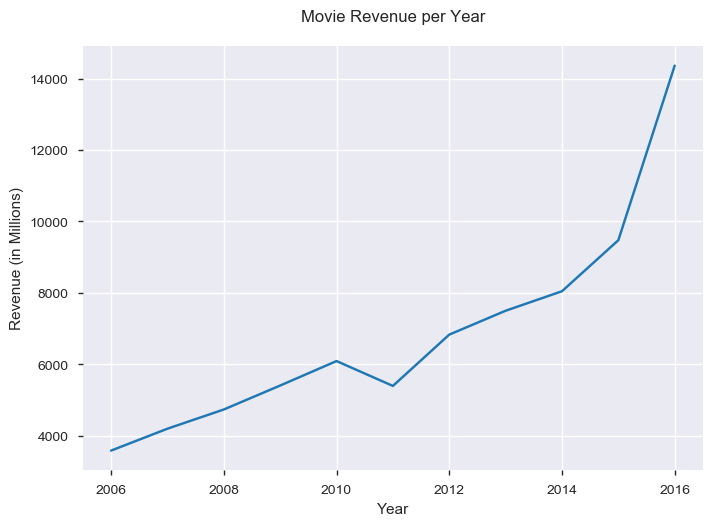

In [36]:
# Plotting the Revenue for each year
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

> ##### 1. There is an upward trend in the overall Revenue from movies over the last 10 year period. 
> ##### 2. There is also a significant increase in the revenue from movies released in 2016, when compared to the revenue from movies released in 2015. This is in correlation with the increase in the number of movies released in 2016 when compared to 2015, as shown in the section 4.1.1.

<a id='section4013'></a>
### 4.1.3 Is the average Revenue from the movies increasing over the years ?

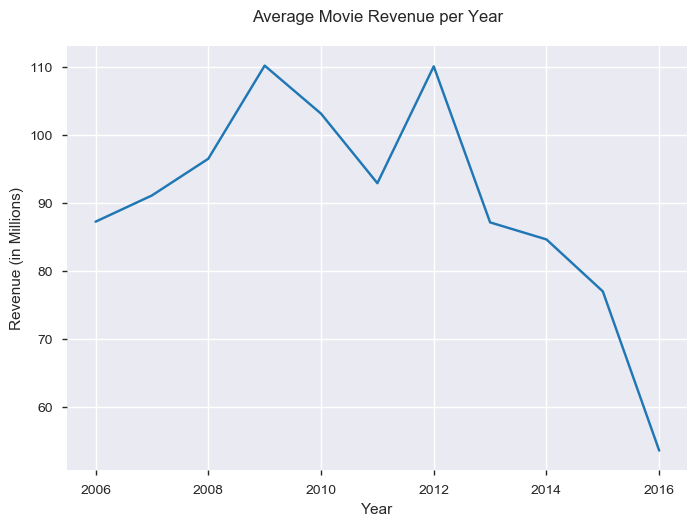

In [37]:
movies_avg_revenue = movies.groupby('Year')['Revenue'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

> ##### 1. We observe that the average Revenue of movies per year is in fact decreasing, while the total revenue of movies is increasing over the years.
> ##### 2. One thing is visibly noticeable from the above charts: Though there is a significant increase in the number of movies, the average Revenue is on the downward trend. This trend indicates, perhaps more producers are coming into the industry and there is a huge competition in the industry. As a result, in a year, multiple movies are getting released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.

<a id='section4014'></a>
### 4.1.4 Is the popularity of the movies increasing over the years?

In [38]:
movies_rating = movies.groupby('Year')['Rating'].mean()
movies_rating.head(11)

Year
2006    7.143902
2007    7.130435
2008    6.716327
2009    6.944898
2010    6.820339
2011    6.910345
2012    6.933871
2013    6.811628
2014    6.816842
2015    6.573984
2016    6.466791
Name: Rating, dtype: float64

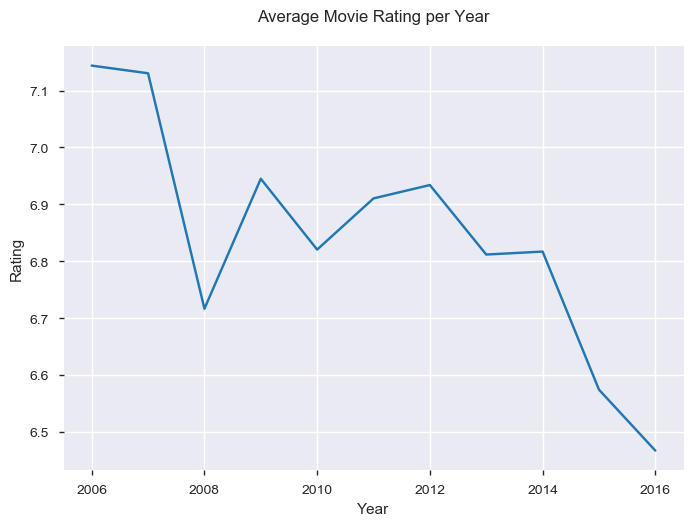

In [39]:
ax = movies_rating.plot.line();
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

> #### 1. We see that the popularity of movies in terms of IMDB rating are decreasing over the years, although the revenue for the movies are increasing over the years

<a id='section402'></a>
### 4.2 What impact do Directors have on the movie?

<a id='section4021'></a>
#### 4.2.1 Does a particular Director's movie receive higher Revenue?

In [40]:
# Calculate the number of movies directed by each Director over the 10 year period
movies.Director.value_counts().head(10)

Ridley Scott          8
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
M. Night Shyamalan    6
Antoine Fuqua         5
J.J. Abrams           5
David Fincher         5
Denis Villeneuve      5
Justin Lin            5
Name: Director, dtype: int64

In [41]:
# Find out the top 5 Directors by Average Revenue Per Movie
revenue_directors = movies.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
top_5_revenue_directors

,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Gary Ross,408.000,1


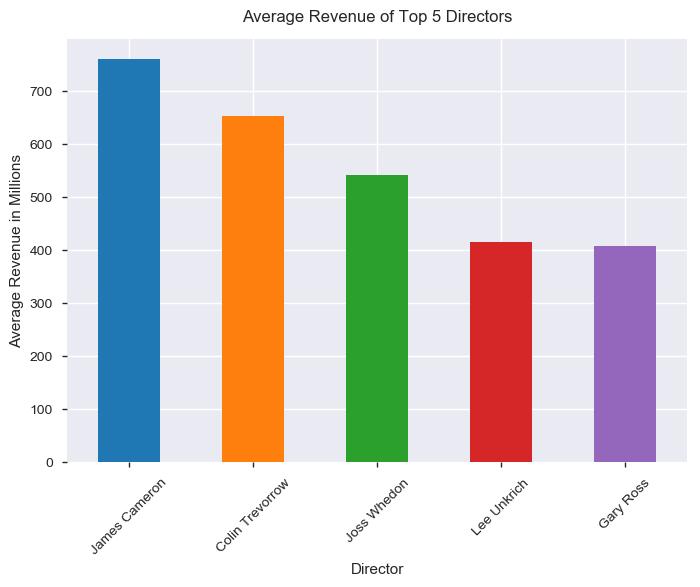

In [42]:
# Plotting the result in the form of a bar chart
arevenue = top_5_revenue_directors['Revenue'].plot.bar(color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
arevenue.set_ylabel('Average Revenue in Millions')
arevenue.set_title('Average Revenue of Top 5 Directors', y=1.02)
arevenue.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

<a id='section4022'></a>
#### 4.2.2 Does a particular Director's movie receive higher IMDB Rating?

In [43]:
# Find out the top 5 Directors by Average IMDB Rating
rating_directors = movies.groupby('Director').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_rating_directors

,Rating,Movies Count
Director,,
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Aamir Khan,8.50,1
Florian Henckel von Donnersmarck,8.50,1


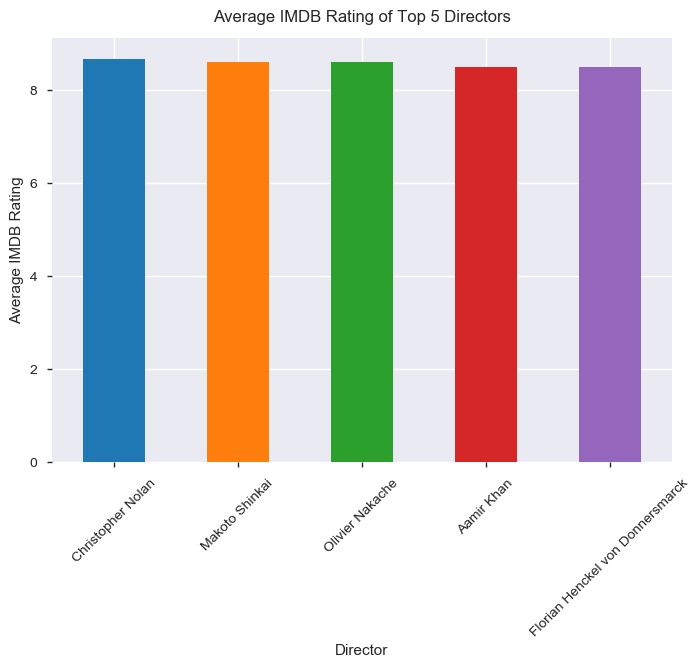

In [44]:
# Plotting the result in the form of a bar chart
arating = top_5_rating_directors['Rating'].plot.bar(color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
arating.set_ylabel('Average IMDB Rating')
arating.set_title('Average IMDB Rating of Top 5 Directors', y=1.02)
arating.set_xticklabels(top_5_rating_directors.index, rotation = 45);

<a id='section4023'></a>
#### 4.2.3 Does a particular Director's movie receive higher Metacritic score ?

In [45]:
# Find out the top 5 Directors by Average Metacritic Score
meta_directors = movies.groupby('Director').agg({'Metascore': 'mean', 'Rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

,Metascore,Movies Count
Director,,
Barry Jenkins,99.0,1
Kenneth Lonergan,96.0,1
Todd Haynes,95.0,1
Kathryn Bigelow,94.5,2
Michael Goi,94.0,1


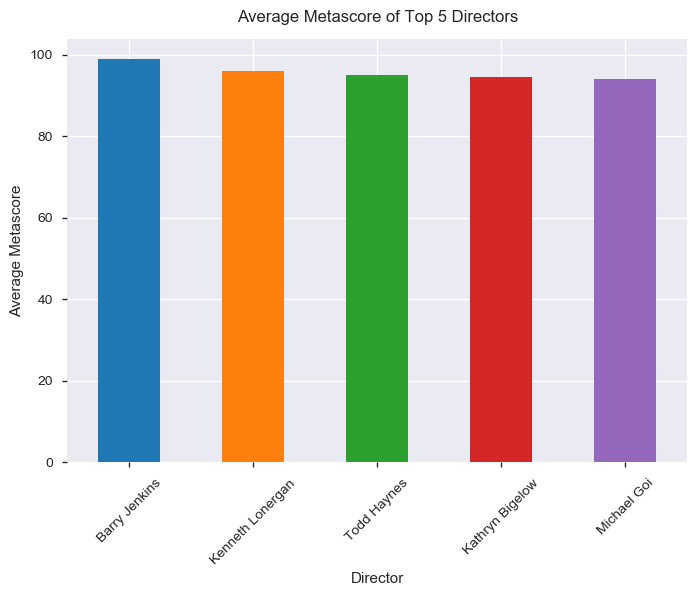

In [46]:
# Plotting the result in the form of a bar chart
ascore = top_5_meta_directors['Metascore'].plot.bar(color = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'));
ascore.set_ylabel('Average Metascore')
ascore.set_title('Average Metascore of Top 5 Directors', y=1.02)
ascore.set_xticklabels(top_5_meta_directors.index, rotation = 45);

> ##### Using the above analysis, we have identified the top Directors in terms of Average Revenue, Rating and Metascore.
> #### 1. It is observed that James Cameron has earned the highest average Revenue. However point to be noted is that he has directed only 1 movie during the said period.
> #### 2. Christopher Nolan has achieved the highest average IMDB Rating for his movies. This shows that he is one of the most popular Director. He is closely followed by Makoto Shinkai and Olivier Nakache.
> #### 3. Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes.
> #### 4. As observed in 4.1, even though there  is an increase in the number of movies by year, the average revenue per movie is decreasing. So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea. For example James Cameron has only directed a single movie (Avatar in 2009) in the last 10 years. In that year(2009), only 50 movies were released as per the 'Movies Count per Year' line graph (above). But in 2016, the trend has changed. The number of movies released in 2016 is around 5 times that of movies in 2009.
> #### 5. So we need to find out the Directors who are more active in terms of directing more movies. Among them we need to find out Directors who earn more Revenue, Rating and Metascore.

<a id='section4024'></a>
#### 4.2.4 Who are the top Active Directors?

In [47]:
# Generating a list of all Directors who have directed 5 or more movies in a year
most_active_directors = movies['Director'].value_counts()[movies['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
M. Night Shyamalan    6
Antoine Fuqua         5
J.J. Abrams           5
David Fincher         5
Denis Villeneuve      5
Justin Lin            5
Christopher Nolan     5
Zack Snyder           5
Peter Berg            5
Martin Scorsese       5
Woody Allen           5
Danny Boyle           5
Name: Director, dtype: int64

In [48]:
# List out the movies from these Active Directors
active_director_movies = movies[movies.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
Resident Evil: The Final Chapter,35,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0


<a id='section4025'></a>
#### 4.2.5 How much is the Revenue contribution by the top Active Directors?

In [49]:
#Determine how much revenue each of these top Directors' films brought in (as a sum for each director) in millions

director_revenue_totals = np.zeros(len(most_active_directors))
i = 0
for director in most_active_directors.index:
    current_director = movies['Director'].str.contains(director).fillna(False)
    director_film_revenue = movies[current_director].xs('Revenue', axis=1).sum()
    director_revenue_totals[i] = director_film_revenue
    i += 1
    print(director, director_film_revenue)

Ridley Scott 719.06
Michael Bay 1421.32
Paul W.S. Anderson 208.92
David Yates 1630.51
M. Night Shyamalan 418.47499999999997
Antoine Fuqua 393.21000000000004
J.J. Abrams 1683.4499999999998
David Fincher 527.72
Denis Villeneuve 216.21
Justin Lin 824.79
Christopher Nolan 1515.0900000000001
Zack Snyder 975.74
Peter Berg 511.33
Martin Scorsese 458.10999999999996
Woody Allen 141.19000000000003
Danny Boyle 183.39999999999998


In [50]:
director_revenue_totals_df = pd.DataFrame(director_revenue_totals, index=most_active_directors.index, columns=['Revenue'])
director_revenue_totals_df

,Revenue
Ridley Scott,719.060
Michael Bay,1421.320
Paul W.S. Anderson,208.920
David Yates,1630.510
M. Night Shyamalan,418.475
Antoine Fuqua,393.210
J.J. Abrams,1683.450
David Fincher,527.720
Denis Villeneuve,216.210
Justin Lin,824.790


Text(0.5, 1.0, 'Most Active Directors % Revenue Contribution')

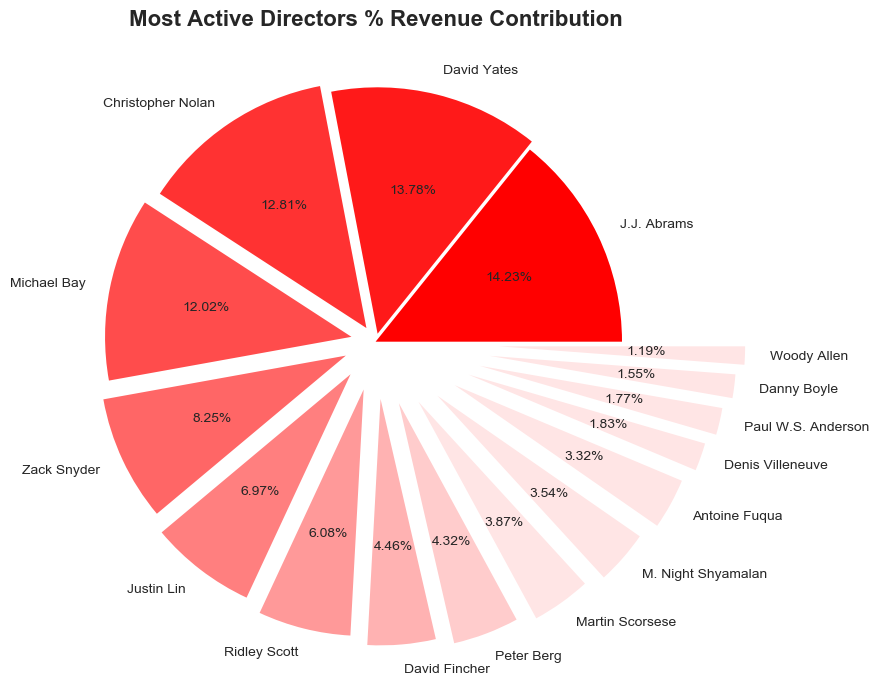

In [51]:
# Exploring the percentage of Revenue contribution from each of these top Directors
explode = np.linspace(0, 0.5, 16)
colors = ['#ff0000', '#ff1919','#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', '#ffb2b2', '#ffcccc', '#ffe5e5', '#ffe5e5','#ffe5e5','#ffe5e5','#ffe5e5','#ffe5e5', '#ffe5e5',]
director_revenue_totals_df.sort_values(by='Revenue', ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Most Active Directors % Revenue Contribution', weight='bold', fontsize=16)

> #### 1. The above chart shows the total percentage revenue generated by individual Directors over the said period. JJ Abrams tops the list.
> #### 2. Since the number of movies directed and produced are different, the total percentage revenue may not be a good figure to ascertain a Directors success. 
> #### For instance David Yates movies have generated higher percentage of total revenue than Christopher Nolan's. However, the number of movies by David Yates is 6 while that of Christopher Nolan is 5.
> #### 3. So we will find and work with the average revenue generated by each Director

<a id='section4026'></a>
#### 4.2.6 What are the average Revenue, Rating and Metascore for the top Active Directors?

In [52]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('Director')['Revenue', 'Rating', 'Metascore'].mean()
active_director_stats

,Revenue,Rating,Metascore
Director,,,
Antoine Fuqua,78.642000,7.040000,52.400000
Christopher Nolan,303.018000,8.680000,74.800000
Danny Boyle,36.680000,7.420000,75.000000
David Fincher,105.544000,7.820000,78.600000
David Yates,271.751667,7.433333,68.500000
Denis Villeneuve,43.242000,7.760000,75.600000
J.J. Abrams,336.690000,7.580000,74.600000
Justin Lin,164.958000,6.820000,57.200000
M. Night Shyamalan,69.745833,5.533333,40.000000


In [53]:
# Lets find out the top 5 active Directors by average Revenue
top_5_active_directors_by_revenue = active_director_stats.sort_values('Revenue', ascending=False)
top_5_active_directors_by_revenue[:5]

,Revenue,Rating,Metascore
Director,,,
J.J. Abrams,336.690000,7.580000,74.600000
Christopher Nolan,303.018000,8.680000,74.800000
David Yates,271.751667,7.433333,68.500000
Michael Bay,236.886667,6.483333,43.833333
Zack Snyder,195.148000,7.040000,48.000000


In [ ]:
#director_revenue_average_df = pd.DataFrame(top_5_active_directors_by_revenue[:5], index=top_5_active_directors_by_revenue[:5].index, columns=['Revenue'])
#i = [0]
#def absolute_value(val):
#    a  = director_revenue_average_df.iloc[i[0]%len(director_revenue_average_df),i[0]//len(director_revenue_average_df)]
#    a = str(round(a,2))
#    i[0] += 1
#    return a
#explode = np.linspace(0, 0.1, 5)
#colors = ['#FF1493','#FF69B4', '#FFB6C1','#FFC0CB','#ffe5e5']
#director_revenue_average_df.sort_values(by='Revenue', ascending=False).plot.pie(legend=False, subplots=True, autopct=absolute_value, figsize=(8,8), colors=colors, explode=explode)
#plt.ylabel('')
#plt.title('Top 5 active Directors by Average Revenue in Millions', weight='bold', fontsize=16)

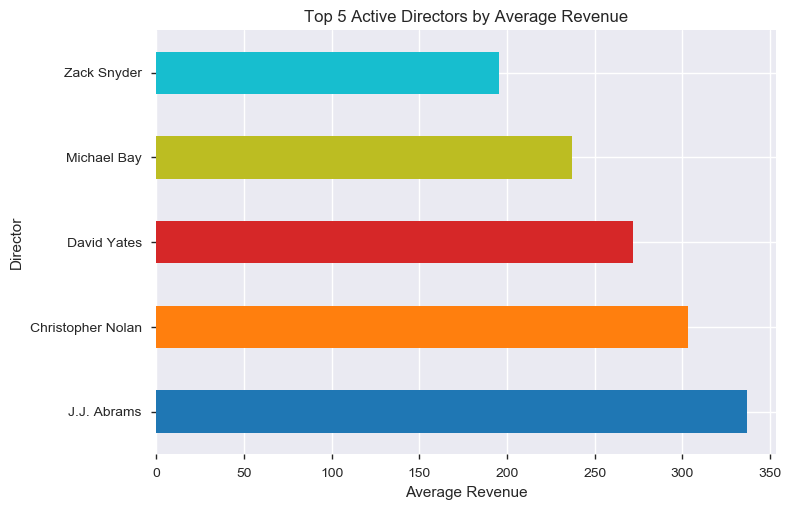

In [54]:
arevenue= top_5_active_directors_by_revenue[:5].Revenue.plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
arevenue.set_title("Top 5 Active Directors by Average Revenue")
arevenue.set_xlabel('Average Revenue');

In [55]:
# Lets find out the top 5 active Directors by average Rating
top_5_active_directors_by_rating = active_director_stats.sort_values('Rating', ascending=False)
top_5_active_directors_by_rating[:5]

,Revenue,Rating,Metascore
Director,,,
Christopher Nolan,303.018,8.68,74.8
Martin Scorsese,91.622,7.92,77.0
David Fincher,105.544,7.82,78.6
Denis Villeneuve,43.242,7.76,75.6
J.J. Abrams,336.690,7.58,74.6


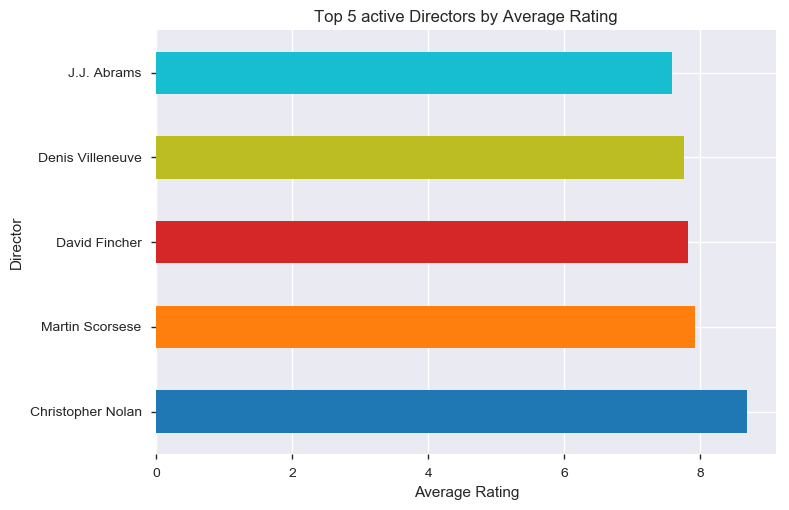

In [56]:
arating = top_5_active_directors_by_rating[:5].Rating.plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
arating.set_title("Top 5 active Directors by Average Rating")
arating.set_xlabel('Average Rating');

In [57]:
# Lets find out the top 5 active Directors by average Metascore
top_5_active_directors_by_metascore = active_director_stats.sort_values('Metascore', ascending=False)
top_5_active_directors_by_metascore[:5]

,Revenue,Rating,Metascore
Director,,,
David Fincher,105.544,7.82,78.6
Martin Scorsese,91.622,7.92,77.0
Denis Villeneuve,43.242,7.76,75.6
Danny Boyle,36.680,7.42,75.0
Christopher Nolan,303.018,8.68,74.8


Text(0.5, 0, 'Average Metascore')

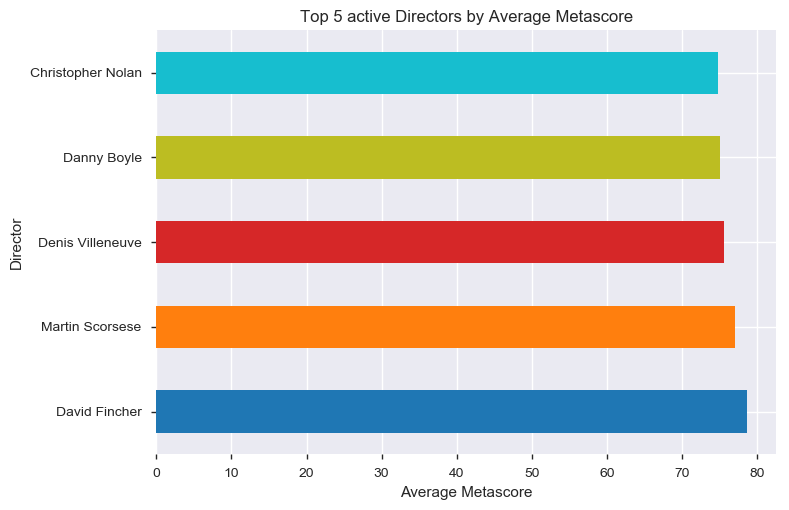

In [58]:
ascore = top_5_active_directors_by_metascore[:5].Metascore.plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
ascore.set_title("Top 5 active Directors by Average Metascore")
ascore.set_xlabel('Average Metascore')

> #### 1. JJ Abrams tops the chart with highest average Revenue closely followed by Christopher Nolan
> #### 2. Christopher Nolan tops the chart with highest average Rating
> #### 3. David Fincher tops the chart with highest average Metascore. Note that Christopher Nolan too features in the top 5 list.
> #### 4. Based on the above assessment, Christopher Nolan, David Fincher. Martin Scorsese and Denis Villeneuve are the most bankable Directors

<a id='section403'></a>
### 4.3 What is the impact of the Runtime on movies?

In [59]:
# Find out the percentiles of the Runtime column
movies.Runtime.describe()

count    936.000000
mean     113.272436
std       18.550798
min       66.000000
25%      100.000000
50%      111.000000
75%      123.000000
max      187.000000
Name: Runtime, dtype: float64

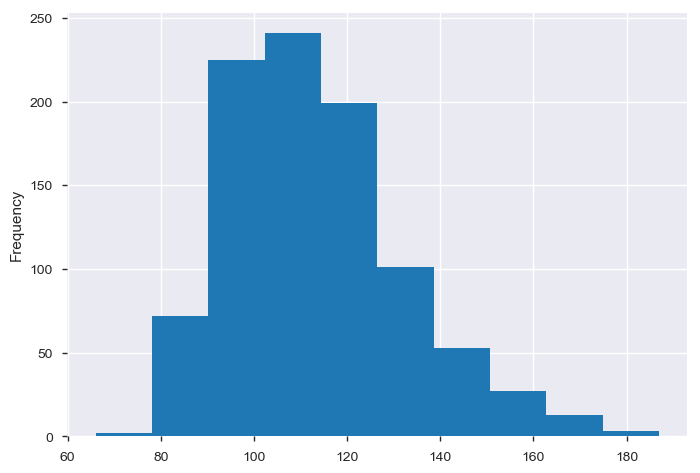

In [60]:
# Plot the distribution of the Runtime column
movies.Runtime.plot.hist()

> ##### Classifying the Runtime into different levels based on the output from the describe method
> | Runtime(in minutes) | Level     |
|---------|-----------------|
|   66-100  | Short|
| 100-111   |Medium|
| 111-123   | Moderately Long|
| 123-187   | Long|

In [61]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
movies['Runtime_levels'] = pd.cut(movies.Runtime, runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Moderately Long
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Moderately Long


Text(0.5, 1.02, 'Movies Count for each Runtime level')

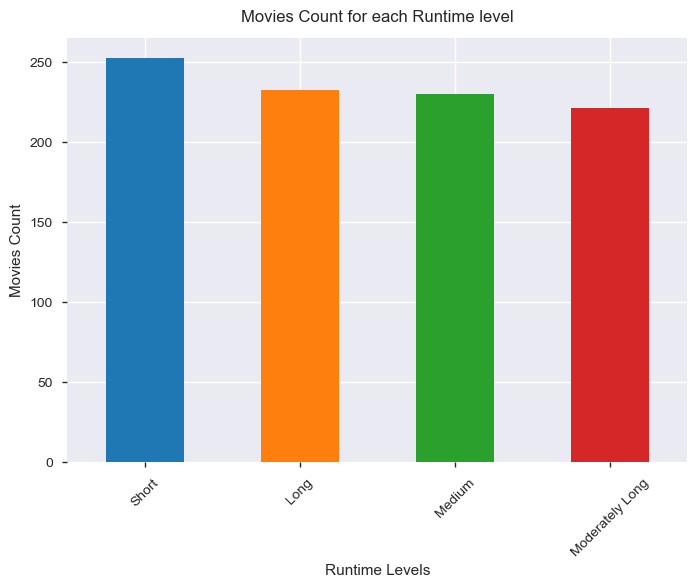

In [62]:
# Plot the count of different Runtime levels
ax = movies.Runtime_levels.value_counts().plot.bar();
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.Runtime_levels.value_counts().index, rotation = 45);
ax.set_title('Movies Count for each Runtime level', y=1.02)

<a id='section4031'></a>
#### 4.3.1 Which interval of Runtime receives higher Revenue?

In [63]:
# Find out the Runtime level that receives the highest mean Revenue, mean Rating and mean Metascore
runtime_stats = movies.groupby('Runtime_levels')['Revenue', 'Rating', 'Metascore'].mean()
runtime_stats

,Revenue,Rating,Metascore
Runtime_levels,,,
Short,58.164940,6.327381,56.456349
Medium,66.974196,6.579130,55.273913
Moderately Long,66.366244,6.848869,59.276018
Long,132.925733,7.195690,65.021552


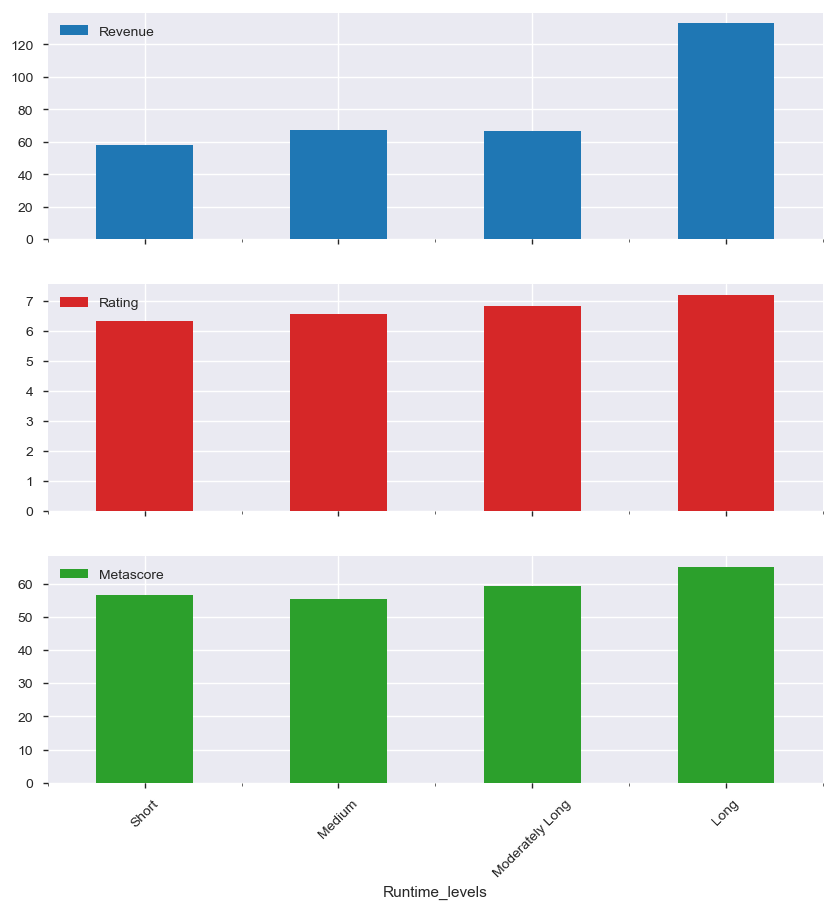

In [64]:
# Plotting the result in the form of a bar chart
ax1, ax2, ax3 = runtime_stats.plot.bar(subplots=True, color = ('tab:blue', 'tab:red', 'tab:green'));
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax3.set_xticklabels(runtime_stats.index, rotation = 45);

> ##### 1. It was observed that movies having Long Runtimes (greater than 123 minutes) earn higher Revenue, are more popular and are critically acclaimed.
> ##### 2. As the Runtime increases the movies tends to earn higher Revenue, higher popularity and critical acclaim.
> ##### 3. It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.

<a id='section404'></a>
### 4.4 What are the different Genre of movies and it's effect on the outcome?

In [65]:
# Since most of these films in the dataset are part of multiple genres, we need to get a list of entirely unique genres, 
# without repeats, to see how many genres we are truly dealing with
unique_genres = movies['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre: 

Western 6
Action 289
Drama 474
Comedy 268
Music 21
Fantasy 98
Mystery 99
Musical 5
Adventure 249
Romance 131
Crime 141
Thriller 183
Biography 71
Animation 46
Sport 16
History 28
Sci-Fi 114
War 12
Horror 108
Family 50


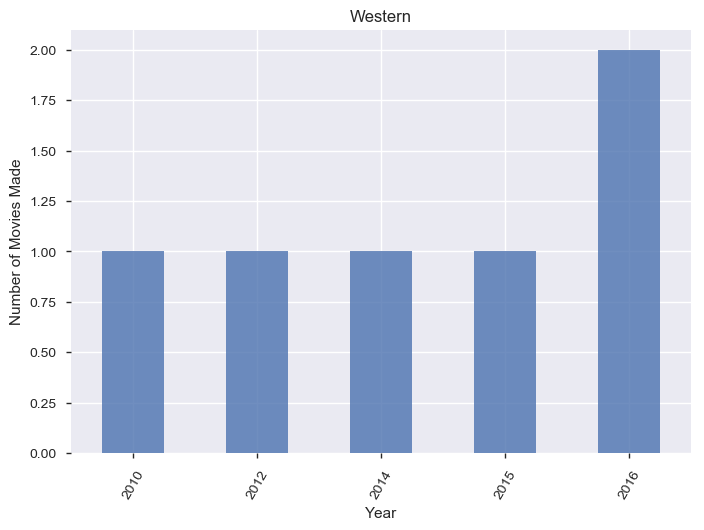

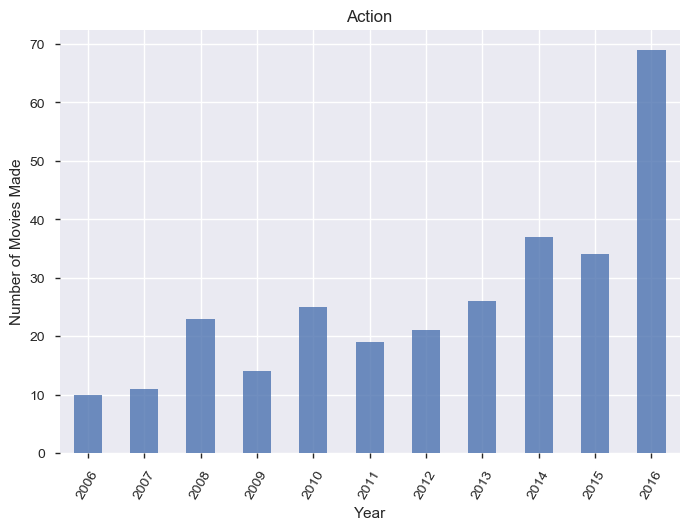

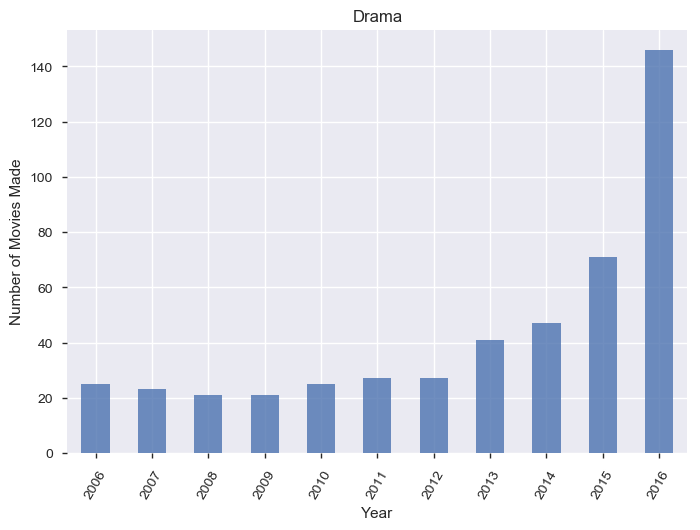

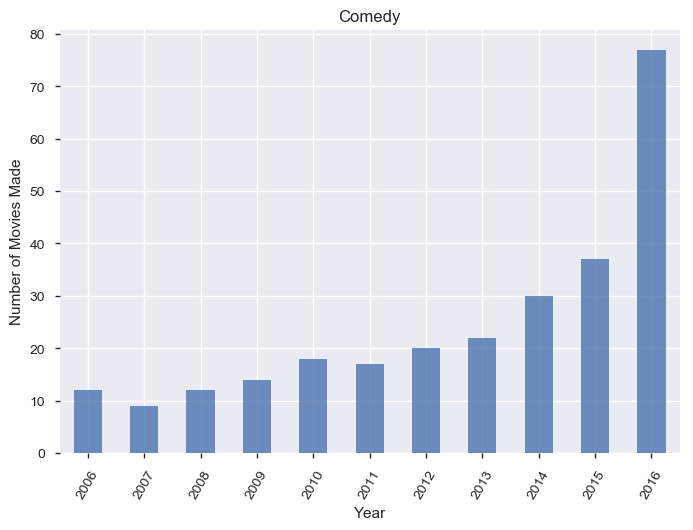

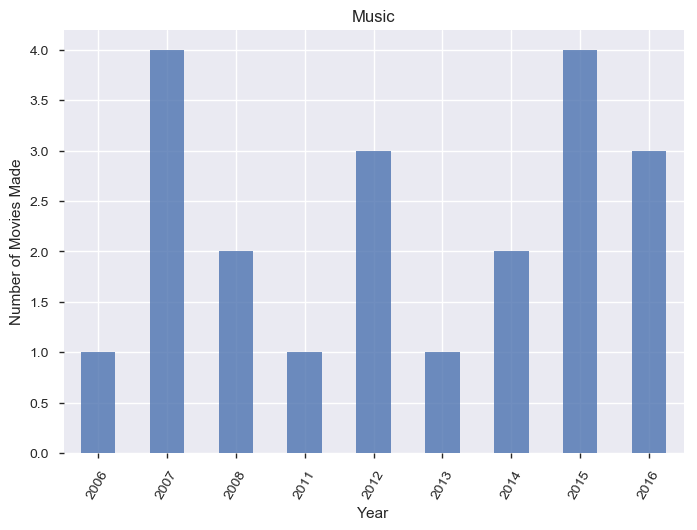

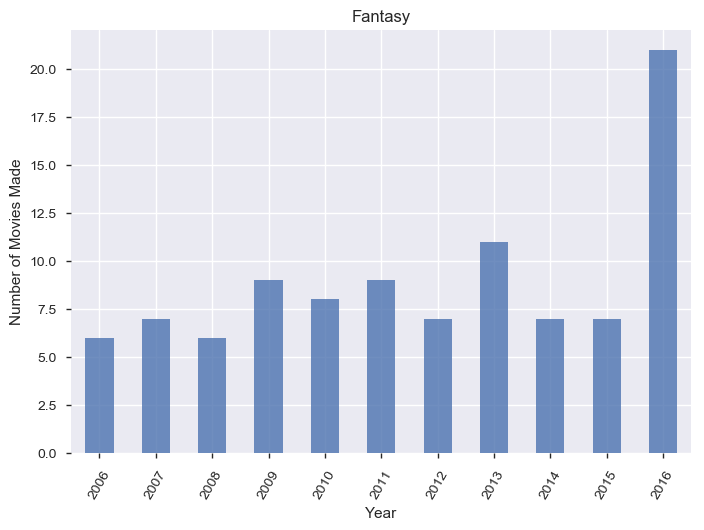

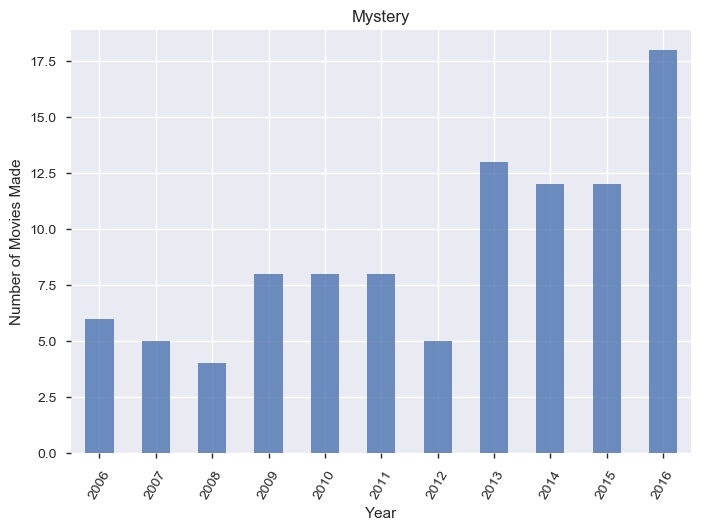

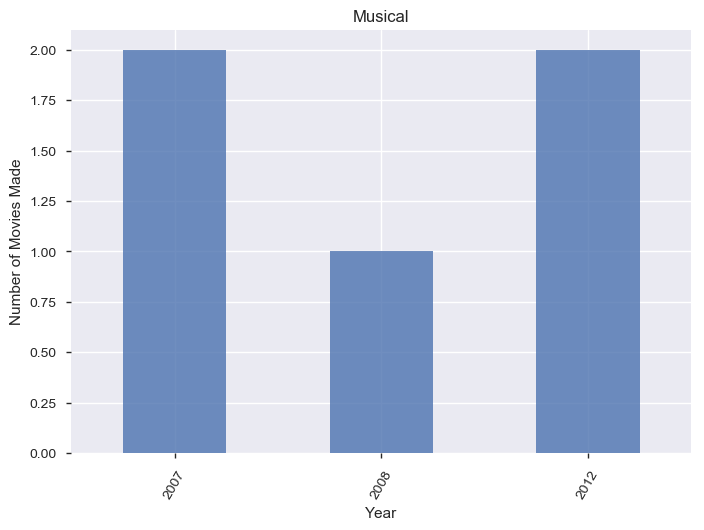

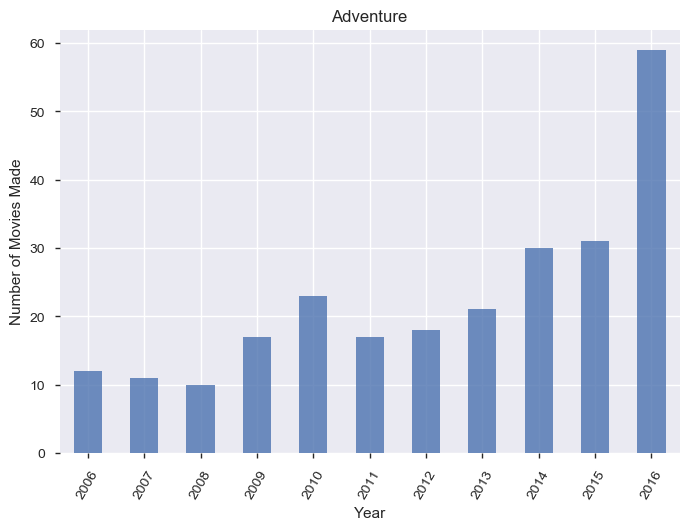

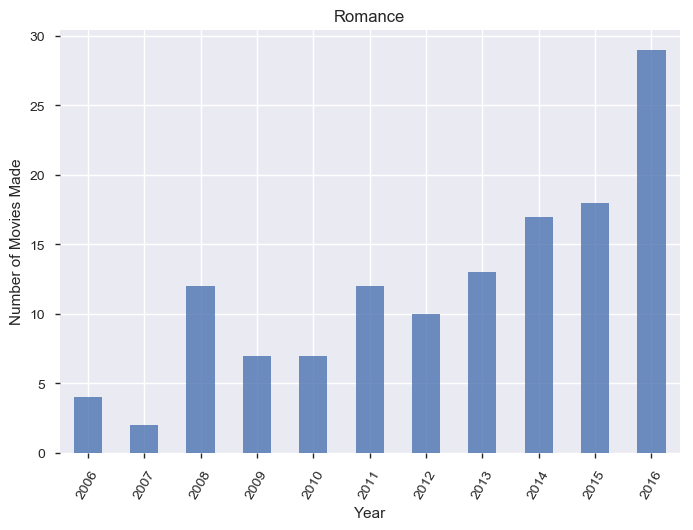

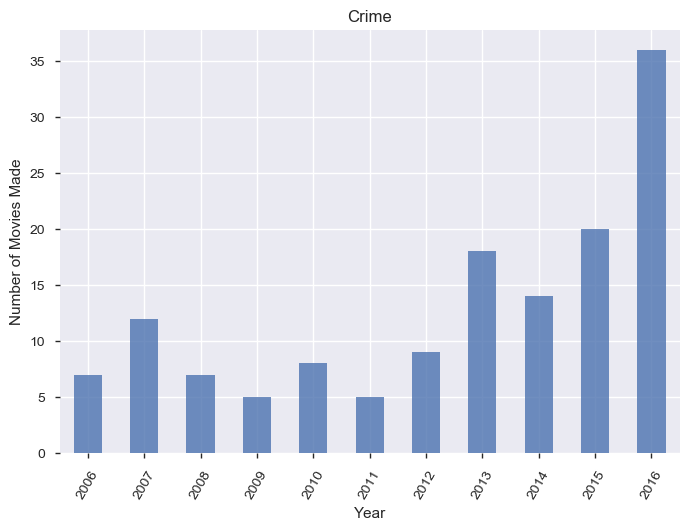

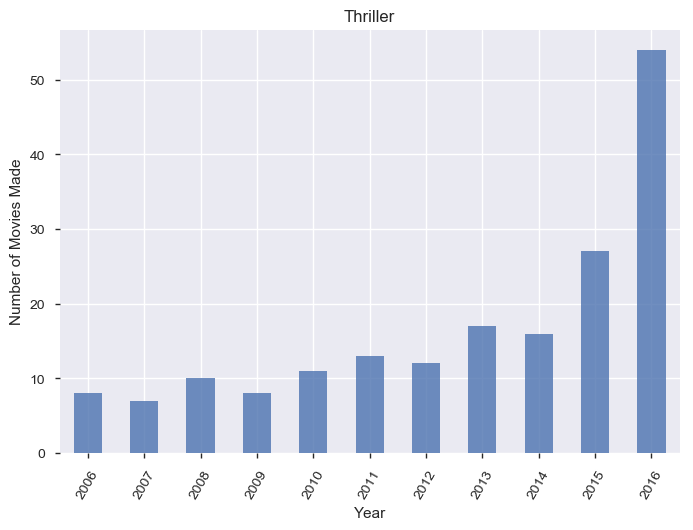

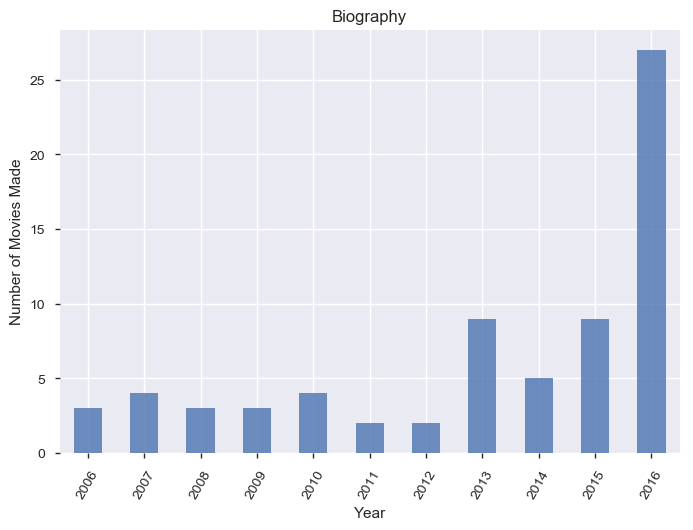

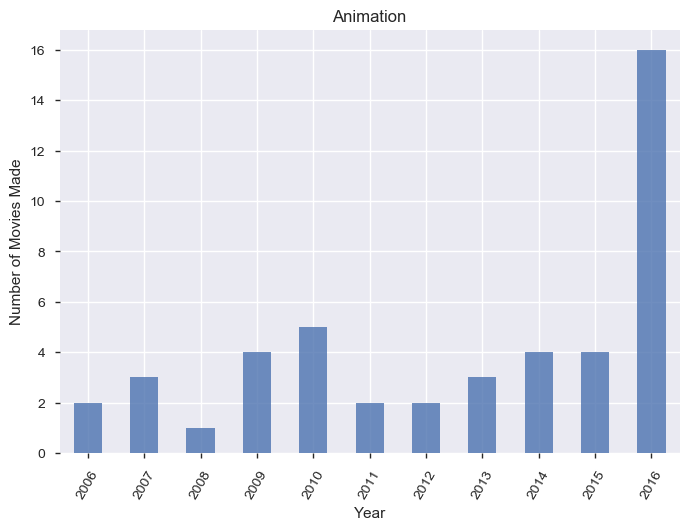

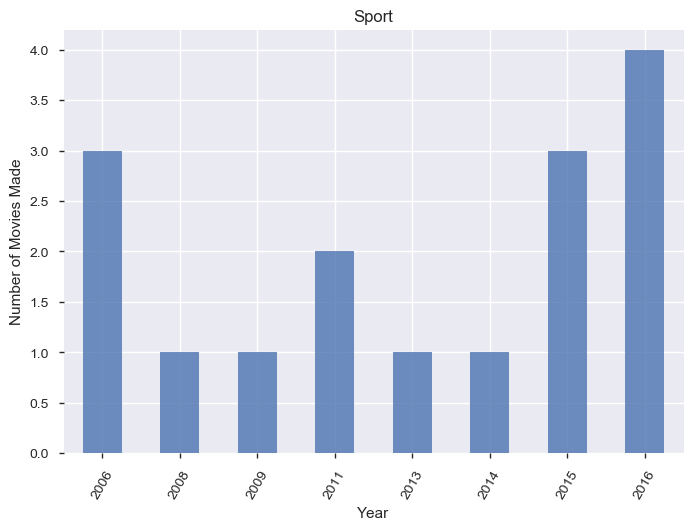

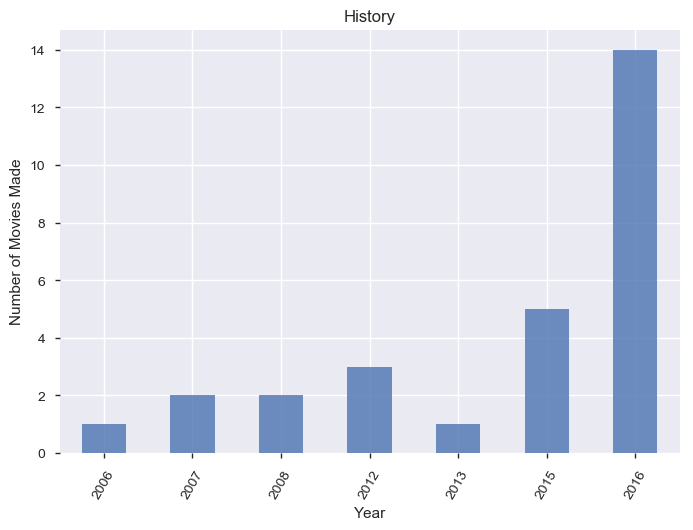

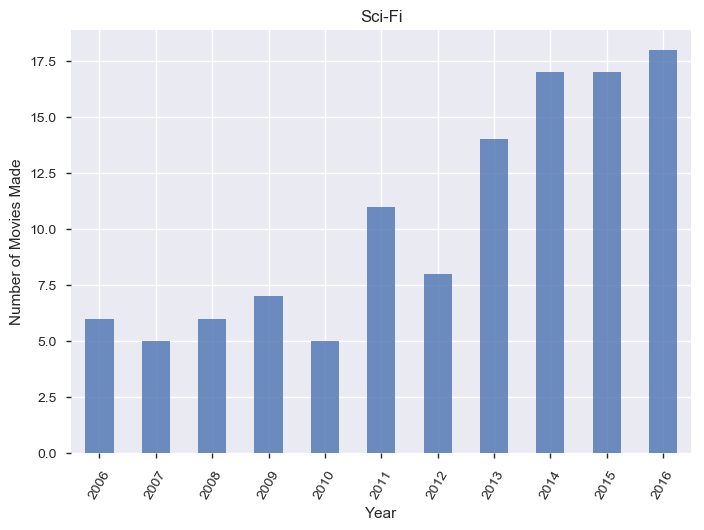

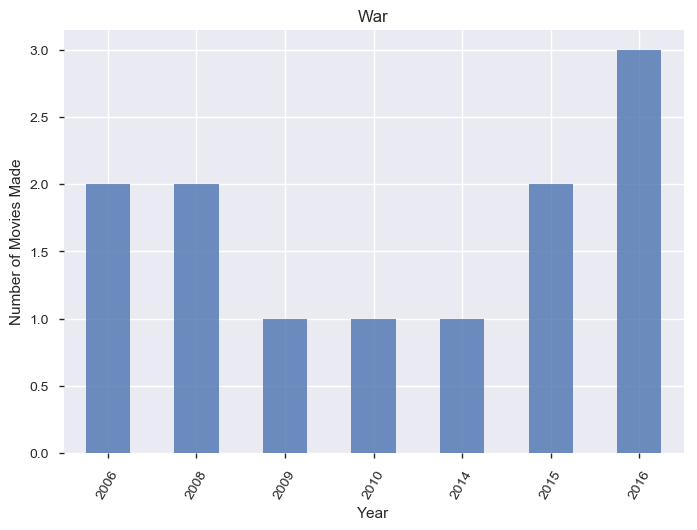

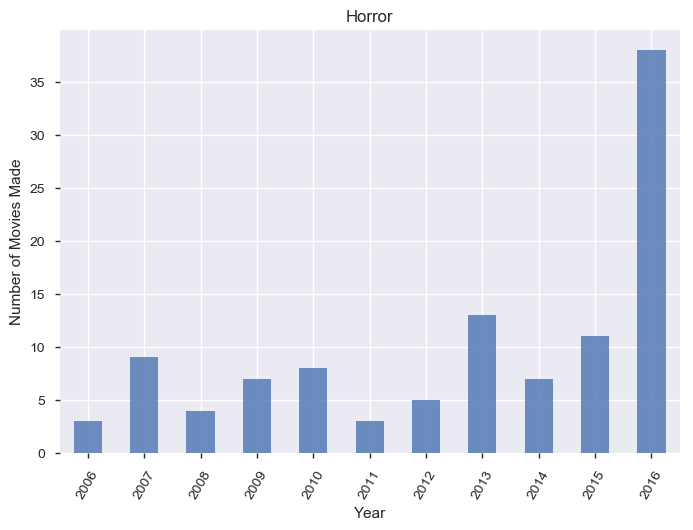

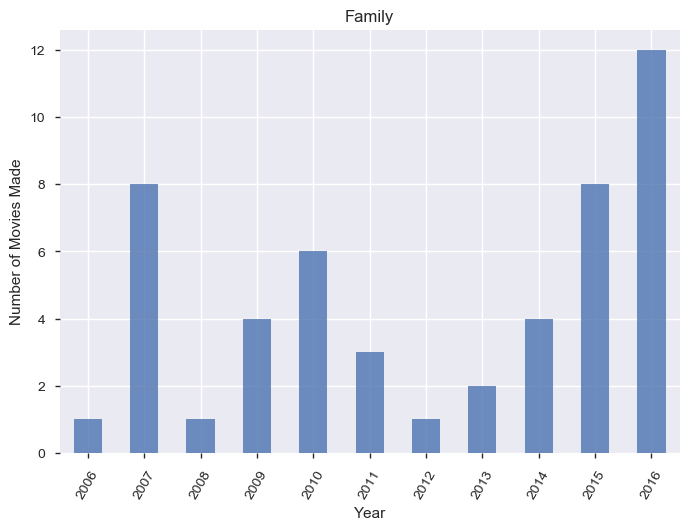

In [66]:
# Now iterating through each genre, counting the number of films from that genre, plot how many films of each genre 
# were made each year onto a bar graph

print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    movies[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='b', alpha=0.8, rot=60)
    print(genre, len(movies[current_genre]))

In [67]:
# Determine the percent of total entries attributed to each Genre, keeping in mind that since some films have multiple genres,
# these percentages won't add to 100%

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    pct = len(movies[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Western 0.6
Action 28.9
Drama 47.4
Comedy 26.8
Music 2.1
Fantasy 9.8
Mystery 9.9
Musical 0.5
Adventure 24.9
Romance 13.100000000000001
Crime 14.099999999999998
Thriller 18.3
Biography 7.1
Animation 4.6
Sport 1.6
History 2.8000000000000003
Sci-Fi 11.4
War 1.2
Horror 10.8
Family 5.0


In [68]:
# Create a dataframe with the Genre percentage values for easy plotting
genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Western,0.6
Action,28.9
Drama,47.4
Comedy,26.8
Music,2.1
Fantasy,9.8
Mystery,9.9
Musical,0.5
Adventure,24.9
Romance,13.1


Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

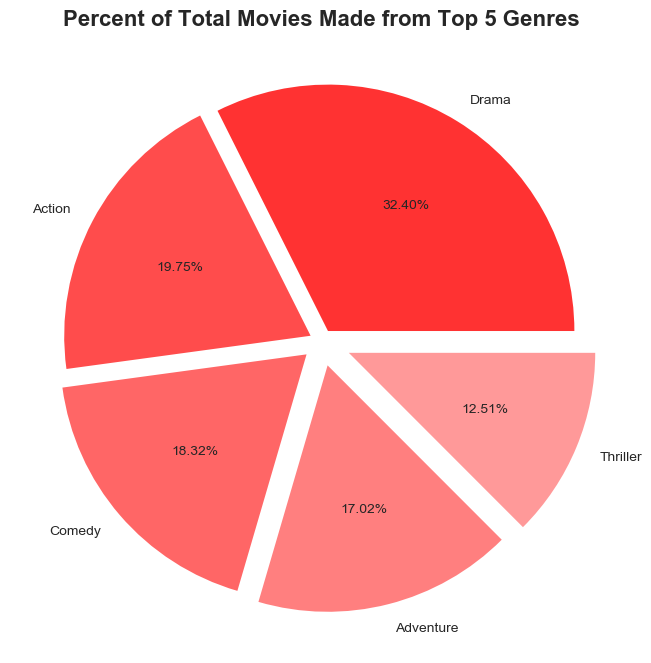

In [69]:
# Taking a sum of the total movies made from the top 5 genres,that contributed to the most in terms of movies made?
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

In [70]:
# Determining the Revenue percentage for each Genre
genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    revenue_pct = movies[current_genre].xs('Revenue', axis=1).sum() / movies['Revenue'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1
    print(genre, revenue_pct)

Western 0.7487332869907394
Action 47.347958378475006
Drama 31.617420051416197
Comedy 26.60115184239601
Music 1.5380196520653087
Fantasy 16.579453398234133
Mystery 7.023794447437348
Musical 0.5401916137901902
Adventure 51.062836031777096
Romance 7.5184903906606575
Crime 11.569550348475929
Thriller 16.078809140898027
Biography 5.488090601756334
Animation 11.518377643972691
Sport 1.394955750233268
History 1.9425050117358449
Sci-Fi 19.907419354027645
War 0.8340872937261631
Horror 5.64009351623175
Family 8.012385726533967


In [71]:
genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df

,Percent
Western,0.748733
Action,47.347958
Drama,31.617420
Comedy,26.601152
Music,1.538020
Fantasy,16.579453
Mystery,7.023794
Musical,0.540192
Adventure,51.062836
Romance,7.518490


Text(0.5, 1.0, 'Percent of Total Revenue from Top 5 Genres')

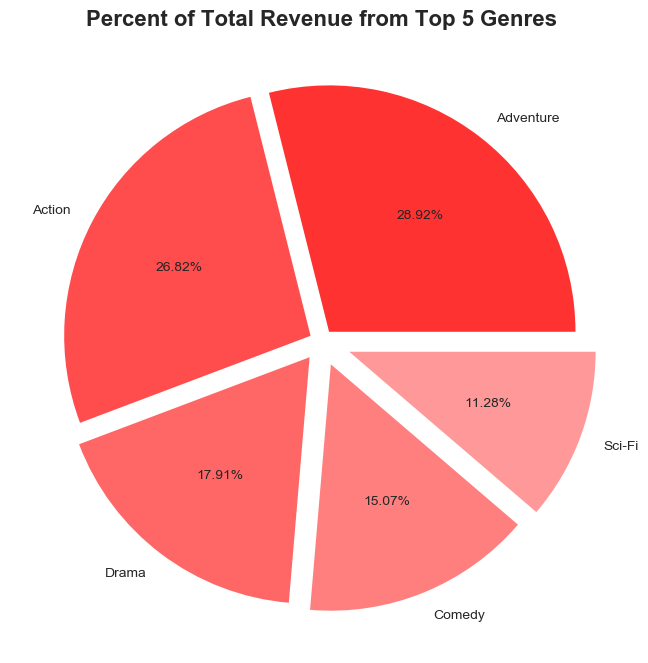

In [72]:
# Taking a sum of the Revenue from the top 5 Genres that contributed to the most in terms of Revenue
explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

> #### 1. The top 5 Genres based on the percentage of total movies made are Drama, Action, Comedy, Adventure and Thriller.
> #### 2. The top 5 Genres based on highest percentage of total revenue are Adventure, Action, Drama, Comedy and Sci-Fi.
> #### 3. The number of movies against the top 5 Genres had been constantly on the rise and in the year 2016, we can see a major spike.

<a id='section4041'></a>
#### 4.4.1 Does the combination of Genres in the movie affect the Revenue, Popularity, Critical Acclaim of the movie?

In [73]:
# The Genre column contains Genre combination as string separated by comma
movies['Genre_count'] = movies.Genre.str.split(',').str.len()

In [74]:
movies.Genre_count.head()

Title
Guardians of the Galaxy    3
Prometheus                 3
Split                      2
Sing                       3
Suicide Squad              3
Name: Genre_count, dtype: int64

In [75]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = movies.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].mean()
genre_count_stats

,Revenue,Rating,Metascore
Genre_count,,,
1,46.641848,6.365217,58.793478
2,55.710591,6.695455,58.677273
3,94.583734,6.794712,59.121795


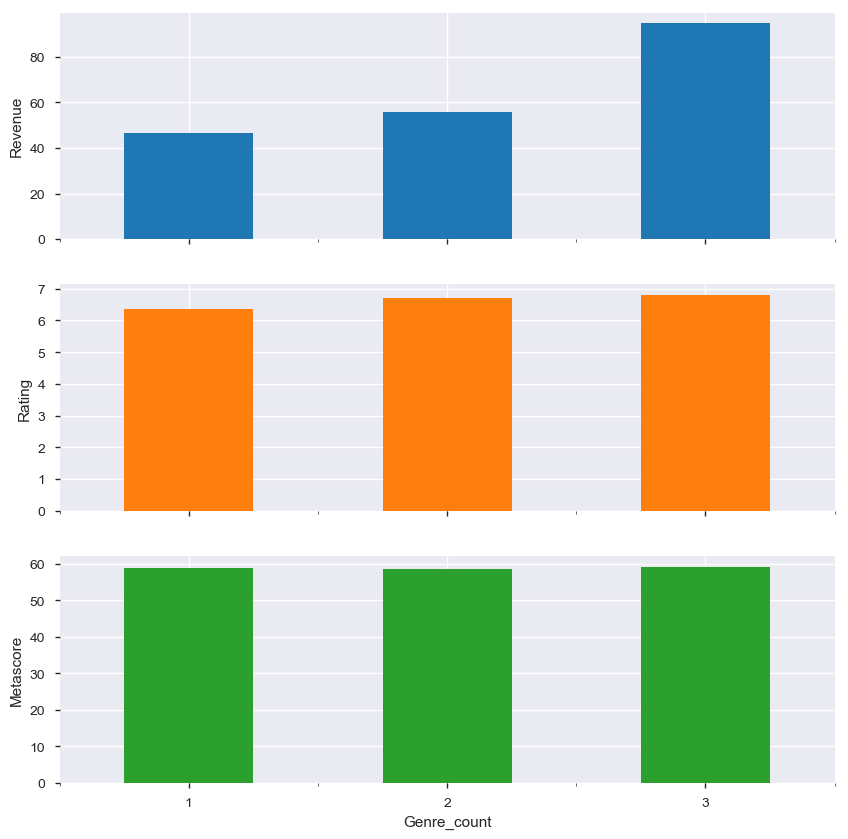

In [76]:
# Plotting the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

> ##### 1. As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.
> ##### 2. Combination of Genres in the same movie increase the Revenue of the movie significantly. On an average, a movie with 3 Genres tends to earn double the revenue than a movie with only 1 Genre.
> ##### 3. The number of Genres in a movie does not impact the IMDB Rating or Metascore significantly. However both the IMDB Rating and Metascore are on the rise when Genre count increases. 
> ##### 4. It should be noted that the Genres do not show up explicitly in a movie. Viewers are unaware of it while seeing the movie. However the number of Genres do have an overall impact on a viewer. When a viewer sits down to rate the movie, he does not rate based on the number of Genres in the movie, he rates it based on his likeness for the movie in its entirety.

<a id='section4042'></a>
#### 4.4.2 What are the Genres that bring higher Revenue, higher Rating and higher Critical Acclaim for a movie?

> Since we know that a Genre count of 3 brings the best out a movie, lets find out which combination of 3 Genres earns more Revenue, Rating and Metascore

In [77]:
genre_3_df = movies[movies.Genre_count == 3]

In [78]:
genre_3_df = genre_3_df.groupby('Genre')['Revenue', 'Rating', 'Metascore'].mean()

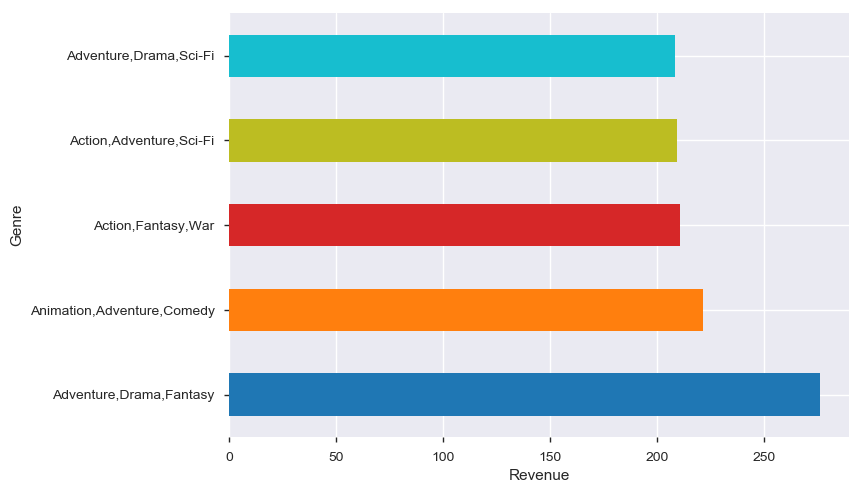

In [79]:
ar = genre_3_df.Revenue.sort_values(ascending=False).head(5).plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
ar.set_xlabel('Revenue');

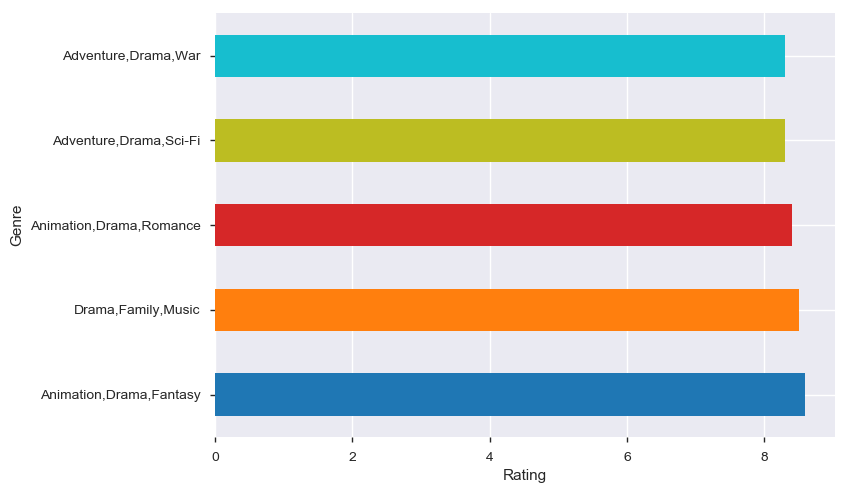

In [80]:
ax = genre_3_df.Rating.sort_values(ascending=False).head(5).plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
ax.set_xlabel('Rating');

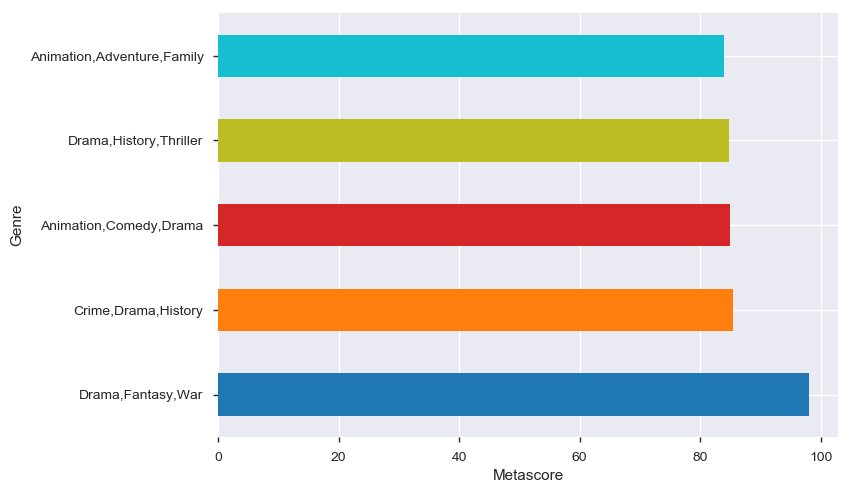

In [81]:
ax = genre_3_df.Metascore.sort_values(ascending=False).head(5).plot.barh(color=('tab:blue', 'tab:orange', 'tab:red', 'tab:olive', 'tab:cyan'));
ax.set_xlabel('Metascore');

> ##### 1. It is observed that Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue.
> ##### 2. The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
> ##### 3. Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore

<a id='section405'></a>
### 4.5 What is the characteristics of movies in 2016?

#### Let's analyze the Genres, Runtime levels for the movies in 2016.

In [82]:
movies.query('Year == 2016').Genre_count.value_counts()

3    157
2     64
1     47
Name: Genre_count, dtype: int64

In [83]:
movies.query('Year == 2016').Genre.value_counts().head(10)

Drama                         23
Comedy                        13
Comedy,Drama                  10
Horror,Thriller               10
Animation,Adventure,Comedy     9
Comedy,Drama,Romance           7
Crime,Drama,Thriller           7
Action,Adventure,Sci-Fi        7
Action,Crime,Drama             7
Action,Adventure,Fantasy       7
Name: Genre, dtype: int64

#### The 3 most popular Genre combinations are (as found in section 4.4.2):
> #### 1. 'Animation, Drama, Fantasy'
> #### 2. 'Drama, Family, Music'
> #### 3. 'Animation, Comedy, Drama'
#### Let's analyze the movie counts of these Genre combinations in 2016

In [84]:
movies.query('Year == 2016').Genre.value_counts().loc['Animation,Drama,Fantasy']

1

In [85]:
'Drama,Family,Music' in movies.query('Year == 2016').Genre.value_counts().index

False

In [86]:
'Animation,Comedy,Drama' in movies.query('Year == 2016').Genre.value_counts().index

True

In [87]:
movies.query('Year == 2016').Genre.value_counts().loc['Animation,Comedy,Drama']

1

#### In section 4.6 we saw that movies with 'Long' runtime tends to get more IMDB Rating. So Let's analyze the runtime levels for movies in 2016

In [88]:
movies.query('Year == 2016').Runtime_levels.value_counts()

Short              100
Medium              69
Moderately Long     53
Long                45
Name: Runtime_levels, dtype: int64

Let's compare the movie runtime levels in 2006

In [89]:
movies.query('Year == 2006').Runtime_levels.value_counts()

Medium             16
Long               13
Moderately Long     9
Short               3
Name: Runtime_levels, dtype: int64

> ##### 1. So it is seems the popularity of movies in terms of IMDB rating is decreasing because of fewer number of movies with the Genre combination that could earn more rating.
> ##### 2. Also the Runtime levels for movies in 2016 is more on the shorter side. We have seen in section 4.4 that movies with 'Long' runtime level brings more rating.

<a id='section406'></a>
### 4.6 Do Ratings have any correlation with other aspects of the movies?

In [90]:
# Creating an array containing the column names for which we want to compare the ratings to see if ratings have any
# correlation with other aspects of the movies
ratings_comparisons = ['Revenue', 'Metascore', 'Runtime', 'Votes']

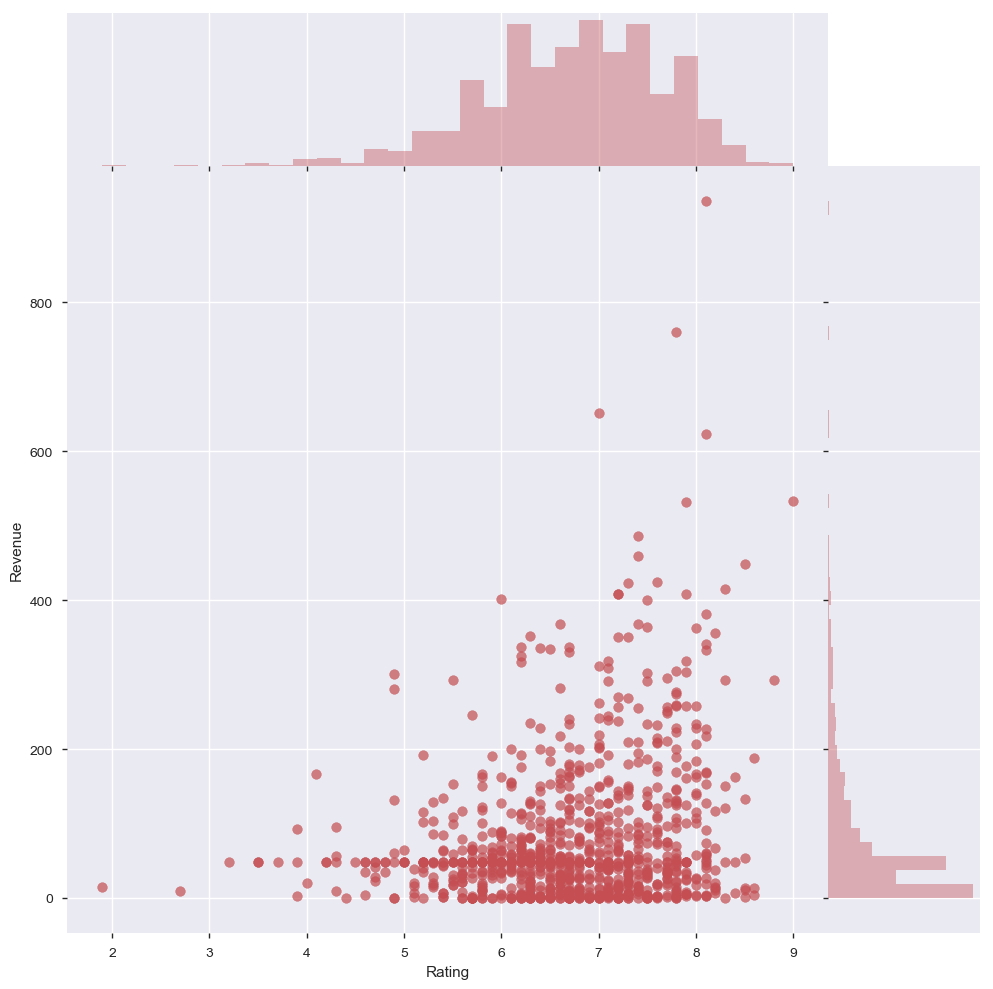

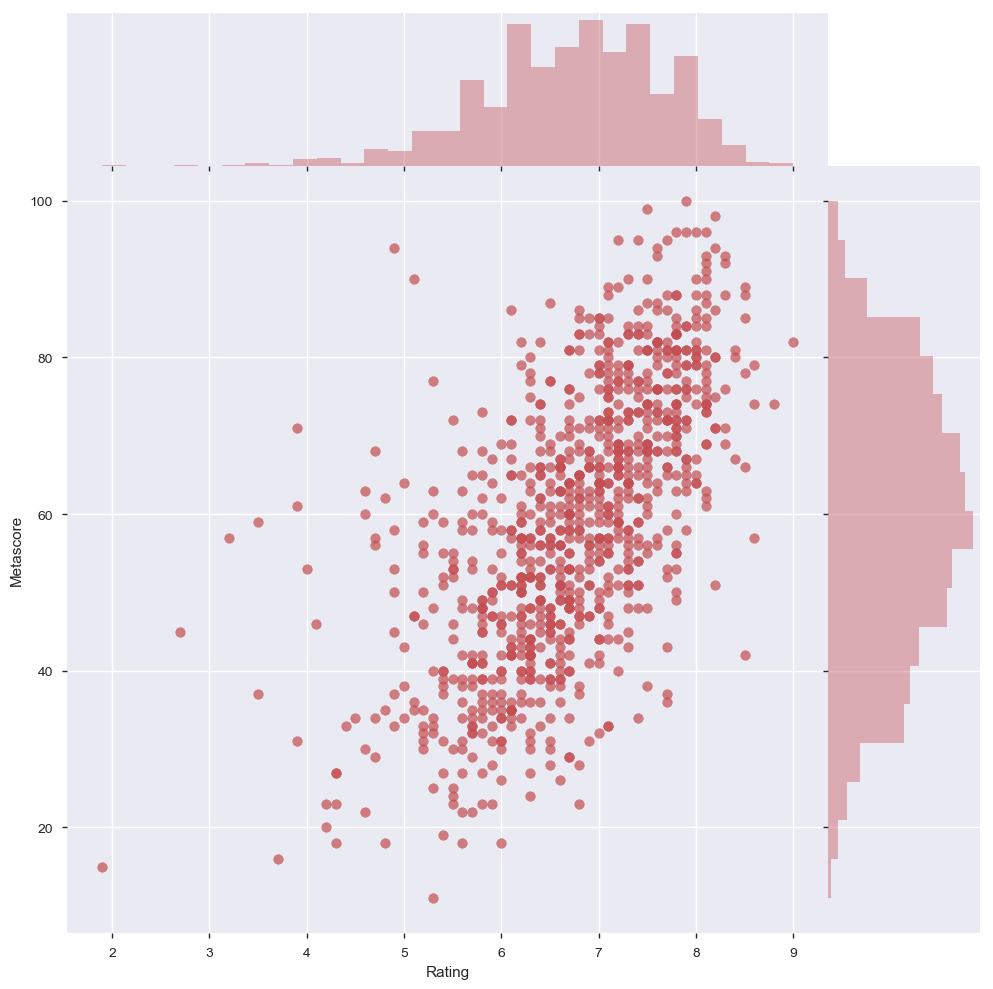

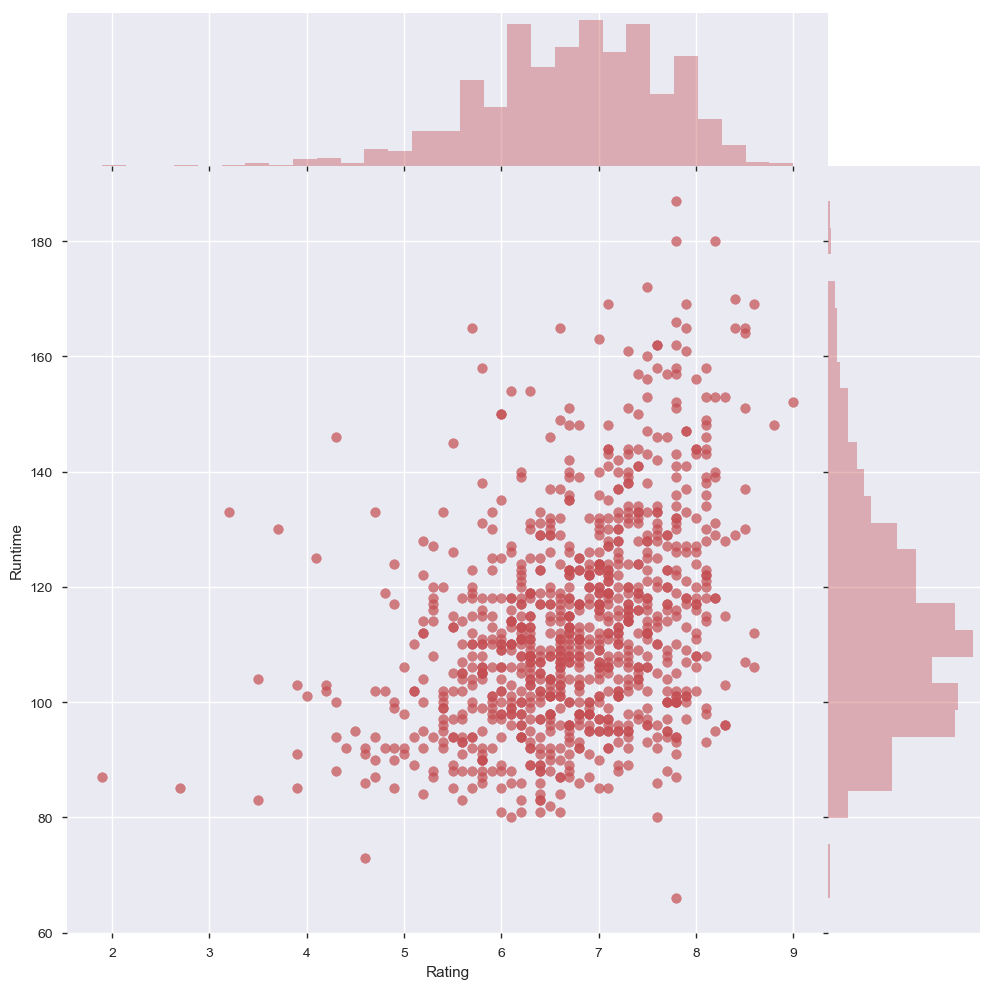

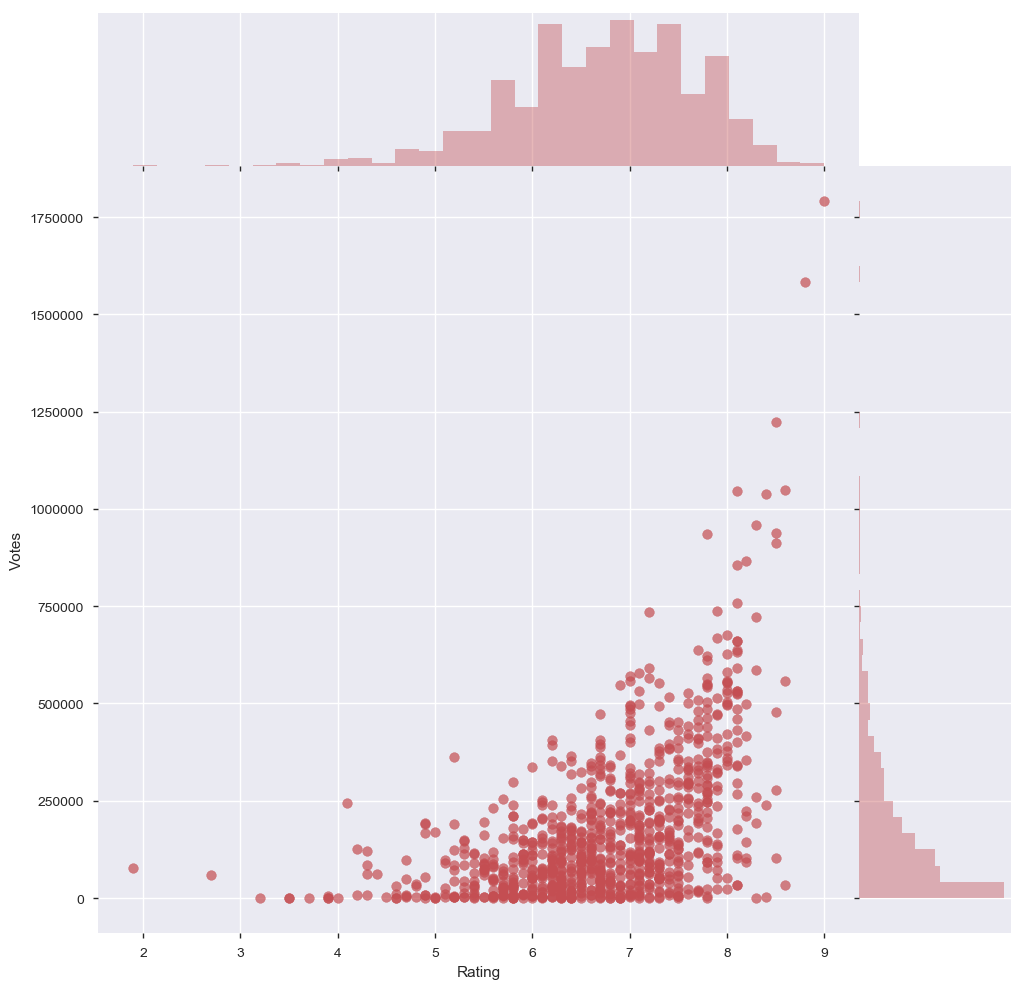

In [91]:
#Created a for loop that iterates through each of the comparisons made above and plotting them separately
for comparison in ratings_comparisons:
    sns.jointplot(x='Rating', y=comparison, data=movies, alpha=0.7, color='r', size=10, space=0)

##### It was observed that Revenue, Metascore, Runtime, Votes, all have a positive correlation with Rating. As the Rating increases, the Revenue, Runtime and Votes also increases.

<a id='section407'></a>
### 4.7 What is the relationship between Revenue, Rating and Metascore of movies ?

In [92]:
#g = sns.pairplot(movies)

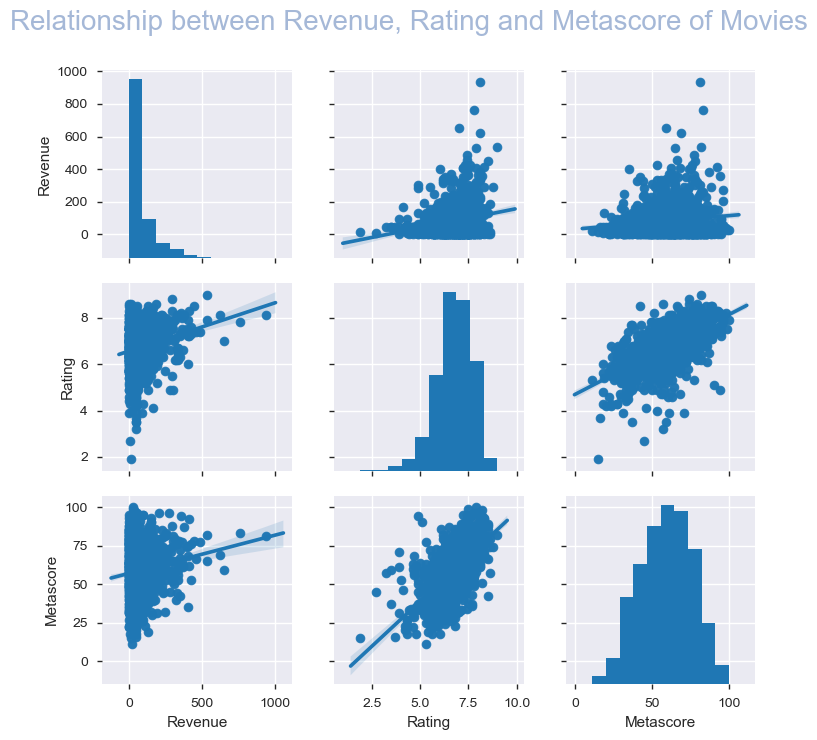

In [93]:
a=sns.pairplot(movies, palette="muted",height=2.5,vars=['Revenue', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5);

> ##### Rating and Metascore have strong correlation. So it means the Registered users on IMDB and Critics on Metacritic tend to agree with each other for most movies.


<a id='section5'></a>
### 5. Conclusion

This section draws the conclusion from the exploration and the findings on the dataset in Section 4.

<strong>Industry Trend</strong>
1.	Industry is growing with respect to number of movies released year on year. There is a 118% increase in the number of movies released in 2016, when compared to the number of movies released in 2015.
2.	The overall Revenue from movies has also been growing over the last 10 year period.
3.	However, the average Revenue of movies year on year is showing a negative trend especially in the recent years. This is probably because of increased competition and more movies released in the industry.
4.	The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.


<strong>Director</strong>

1.	It is observed that James Cameron has earned the highest average Revenue. However point to be noted is that he has directed only 1 movie during the said period.
2.	Christopher Nolan has achieved the highest average IMDB Rating for his movies. This shows that he is one of the most popular directors. 
3.	Critics liked Barry Jenkins's movies the most. 
4.	Looking at the movie Industry Trend, movies of the most active Directors are more favoured by the audience.
5.	The top 5 active Directors by average Revenue are JJ Abrams, Christopher Nolan, David Yates, Michael Bay and Zack Snyder.
6.	The top 5 active Directors by average Rating are Christopher Nolan, Martin Scorsese, David Fincher, Denis Villeneuve and JJ Abrams.
7.	The top 5 active Directors by average Metascore are David Fincher, Martin Scorsese, Denis Villeneuve, Danny Boyle and Christopher Nolan.
8.	Among the most active Directors, J J Abrams's movies earn more in terms of average Revenue and also he contributes the maximum percentage of the total Revenue.
9.	Christopher Nolan is the most popular active Director in terms of average Rating among people
10.	With respect to Directors who are most active, critics favour David Fincher in terms of average Metascore.
11.	From all of the above observations, Christopher Nolan, David Fincher. Martin Scorsese and Denis Villeneuve can be considered as the most bankable Directors for movies based on their scores with respect to Revenue, Rating and Metascore.


<strong>Runtime</strong>

1.	As the Runtime increases the movies tends to earn higher Revenue, higher Popularity (Rating) and Critical Acclaim (Metascore).
2.	It was observed that movies with Runtime (greater than 123 minutes) beat other movies in terms of Revenue by a significant margin.
3.	Movies with Long Runtimes (greater than 123 minutes) earn more in terms of Revenue, Rating and Metascore. 


<strong>Genre</strong>

1.	The top 5 Genres based on the percentage of total movies made are Drama, Action, Comedy, Adventure and Thriller.
2.	The top 5 Genres based on highest percentage of total Revenue are Adventure, Action, Drama, Comedy and Sci-Fi.
3.	The number of movies against the top 5 Genres had been constantly on the rise and in the year 2016, we can see a major spike.
4.	As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise. 
5.	Revenue is significantly high for movies with Genre count of 3.
6.	Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue
7.	The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
8.	Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore.


<strong>Rating for movies in General</strong>

1.	It was observed that Revenue, Metascore, Runtime and Votes, all have a positive correlation with Rating. As the Rating increases, the Revenue, Metascore, Runtime and votes also increases.
2.	From the correlation graph, it is clear that People and Critics rate movies in a similar manner.
3.	In general, movies with higher Rating and Metascore tend to earn more Revenue as well.

<a id='section6'></a>
### 6. Actionable Insights

This section describes the actions the Production company NeoAge Cinema should possibly take to achieve their goal as mentioned in the Problem Statement (Section 1). This is based on the conclusions drawn from the EDA done in Section 4.

1. <strong>Produce multiple movies with best features</strong> - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.

2. <strong>Produce movies with Active Directors</strong> - Take the service of those Directors who directs multiple moderately high budget movies. For instance, Christopher Nolan movies is certain to bring in more Revenue, Rating and Metascore. Likewise David Fincher. Martin Scorsese and Denis Villeneuve can be considered as the most bankable directors for movies based on their scores with respect to Revenue, Rating and Metascore.

3. <strong>Produce movies with Moderately Long to Long Runtimes</strong> - Runtime greater than 2 hrs earns the highest Revenue, Rating and Metascore.

4. <strong>Produce movies with 3 Genre combination</strong> - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.

5. <strong>Produce movies that will satisfy both People and Critics</strong> - These movies will earn higher Revenue more often than not.